In [1]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
## Import_Local
from Src_Dev_Common import Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import Data_Preprocessing as com_Prep
from Src_Dev_Common import Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

## Data Load

In [4]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)

data = df_KIER_5Domain.drop(['METER_DATE', 'YEAR'], axis=1)
back_data = df_KIER_5Domain.drop(['YEAR'], axis=1)

print(df_KIER_5Domain.shape, '///', df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 29) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


METER_DATE  YEAR  MONTH  DAY  code_day_of_the_week  HOUR  \
0      2022-07-20 13:00:00  2022      7   20                     2    13   
1      2022-07-20 14:00:00  2022      7   20                     2    14   
2      2022-07-20 15:00:00  2022      7   20                     2    15   
3      2022-07-20 16:00:00  2022      7   20                     2    16   
4      2022-07-20 17:00:00  2022      7   20                     2    17   
...                    ...   ...    ...  ...                   ...   ...   
16408  2024-06-03 05:00:00  2024      6    3                     0     5   
16409  2024-06-03 06:00:00  2024      6    3                     0     6   
16410  2024-06-03 07:00:00  2024      6    3                     0     7   
16411  2024-06-03 08:00:00  2024      6    3                     0     8   
16412  2024-06-03 09:00:00  2024      6    3                     0     9   

       MINUTE  temp_outdoor  temp_dew_point   temp_ground  ...     sunshine  \
0           0 29.8000000000   21.4000000000 41.5000000000  ... 1.0000000000   
1           0 30.4000000000   20.0000000000 42.4000000000  ... 1.0000000000   
2           0 30.5000000000   21.0000000000 41.9000000000  ... 0.8000000000   
3           0 30.8000000000   20.7000000000 39.7000000000  ... 1.0000000000   
4           0 29.5000000000   20.0000000000 34.5000000000  ... 0.3000000000   
...       ...           ...             ...           ...  ...          ...   
16408       0 13.1000000000   10.8000000000 14.7000000000  ... 0.0000000000   
16409       0 13.7000000000   10.8000000000 15.0000000000  ... 0.1000000000   
16410       0 18.0000000000   11.9000000000 17.0000000000  ... 1.0000000000   
16411       0 19.7000000000   12.2000000000 22.5000000000  ... 1.0000000000   
16412       0 21.1000000000   12.2000000000 30.2000000000  ... 1.0000000000   

       solar_radiation  cloud_total  cloud_midlow    visual_range  \
0         2.8900000000 8.0000000000  2.0000000000 1903.0000000000   
1         2.8500000000 8.0000000000  1.0000000000 1986.0000000000   
2         2.3800000000 7.0000000000  2.0000000000 1985.0000000000   
3         2.1900000000 5.0000000000  3.0000000000 1993.0000000000   
4         1.0200000000 9.0000000000  1.0000000000 2000.0000000000   
...                ...          ...           ...             ...   
16408     0.0000000000 0.0000000000  0.0000000000 2976.0000000000   
16409     0.0500000000 0.0000000000  0.0000000000 3874.0000000000   
16410     0.5600000000 0.0000000000  0.0000000000 5000.0000000000   
16411     1.2500000000 0.0000000000  0.0000000000 5000.0000000000   
16412     1.9500000000 0.0000000000  0.0000000000 3955.0000000000   

           ELEC_INST    HEAT_INST    WATER_INST     HOT_INST     GAS_INST  
0     194.7787303232 0.0001975346  7.0350500000 0.0000093275 0.0000000000  
1     185.5468089258 0.0001975346  7.0453500000 0.0000031403 0.0003690685  
2     191.8368089258 0.0001975346  6.4400500000 0.0000034357 0.0102684149  
3     185.9038264696 0.0001975346  7.4170000000 0.0000072374 0.0218035922  
4     189.2517825136 0.0001975346 10.2510000000 0.0000123613 0.0218035922  
...              ...          ...           ...          ...          ...  
16408  80.6379999998 0.0000000000  6.0601202899 0.0000305033 0.0000000000  
16409  85.4079999998 0.0000000000  8.2929202899 0.0000944223 0.1200000000  
16410 111.6829999997 0.0000000000 11.7601202899 0.0002607810 0.3600000000  
16411 121.9929999998 0.0000000000  9.9387202899 0.0000540724 0.3800000000  
16412 122.4830000000 0.0000000000  6.3371202899 0.0000063394 0.3800000000  

[16413 rows x 29 columns]

##  For Scaling

In [5]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

## Input/Target 분리
multi0401_ELEC_HEAT_WATER_HOT_X = new_data.drop(['GAS_INST'], axis=1).iloc[:-1,]
multi0401_ELEC_HEAT_WATER_HOT_Y = new_data[['ELEC_INST', 'HEAT_INST', 'WATER_INST','HOT_INST']].iloc[1:,]

multi0402_ELEC_HEAT_WATER_GAS_X = new_data.drop(['HOT_INST'], axis=1).iloc[:-1,]
multi0402_ELEC_HEAT_WATER_GAS_Y = new_data[['ELEC_INST', 'HEAT_INST', 'WATER_INST','GAS_INST']].iloc[1:,]

multi0403_ELEC_HEAT_HOT_GAS_X = new_data.drop(['WATER_INST'], axis=1).iloc[:-1,]
multi0403_ELEC_HEAT_HOT_GAS_Y = new_data[['ELEC_INST', 'HEAT_INST','HOT_INST', 'GAS_INST']].iloc[1:,]

multi0404_ELEC_WATER_HOT_GAS_X = new_data.drop(['HEAT_INST'], axis=1).iloc[:-1,]
multi0404_ELEC_WATER_HOT_GAS_Y = new_data[['ELEC_INST', 'WATER_INST','HOT_INST', 'GAS_INST']].iloc[1:,]

multi0405_HEAT_WATER_HOT_GAS_X = new_data.drop(['ELEC_INST'], axis=1).iloc[:-1,]
multi0405_HEAT_WATER_HOT_GAS_Y = new_data[['HEAT_INST', 'WATER_INST','HOT_INST', 'GAS_INST']].iloc[1:,]

## Train/Test 분리
train0401X, test0401X, train0401Y, test0401Y = train_test_split(multi0401_ELEC_HEAT_WATER_HOT_X, multi0401_ELEC_HEAT_WATER_HOT_Y, test_size=0.3, shuffle=False, random_state=0)
train0402X, test0402X, train0402Y, test0402Y = train_test_split(multi0402_ELEC_HEAT_WATER_GAS_X, multi0402_ELEC_HEAT_WATER_GAS_Y, test_size=0.3, shuffle=False, random_state=0)
train0403X, test0403X, train0403Y, test0403Y = train_test_split(multi0403_ELEC_HEAT_HOT_GAS_X, multi0403_ELEC_HEAT_HOT_GAS_Y, test_size=0.3, shuffle=False, random_state=0)
train0404X, test0404X, train0404Y, test0404Y = train_test_split(multi0404_ELEC_WATER_HOT_GAS_X, multi0404_ELEC_WATER_HOT_GAS_Y, test_size=0.3, shuffle=False, random_state=0)
train0405X, test0405X, train0405Y, test0405Y = train_test_split(multi0405_HEAT_WATER_HOT_GAS_X, multi0405_HEAT_WATER_HOT_GAS_Y, test_size=0.3, shuffle=False, random_state=0)

In [6]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [7]:
train0401x, train0401y = buildDataSet(train0401X, train0401Y, 24)
test0401x, test0401y = buildDataSet(test0401X, test0401Y, 24)

train0402x, train0402y = buildDataSet(train0402X, train0402Y, 24)
test0402x, test0402y = buildDataSet(test0402X, test0402Y, 24)

train0403x, train0403y = buildDataSet(train0403X, train0403Y, 24)
test0403x, test0403y = buildDataSet(test0403X, test0403Y, 24)

train0404x, train0404y = buildDataSet(train0404X, train0404Y, 24)
test0404x, test0404y = buildDataSet(test0404X, test0404Y, 24)

train0405x, train0405y = buildDataSet(train0405X, train0405Y, 24)
test0405x, test0405y = buildDataSet(test0405X, test0405Y, 24)

In [8]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)
    #conv3 = tf.keras.layers.Conv1D(32, 1, activation='swish')(pool2) #
    #pool3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv3)#

    # 인코더 - 디코더 선언
    #encoder_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    #decoder_lstm3 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #

    # 인코더
    #encoder_output_lstm1 = encoder_lstm1(pool3) #
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)
    #decoder_lstm3_output = decoder_lstm3(decoder_lstm2_output) #

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(4)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)
    
    model.summary()
    
    return model

In [9]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)

    # 인코더 - 디코더 선언
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')

    # 인코더
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(4)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)
    
    model.summary()
    
    return model


In [10]:
model_4multi_0401 = seq2seq_model(input_shape=(24, 26))
model_4multi_0402 = seq2seq_model(input_shape=(24, 26))
model_4multi_0403 = seq2seq_model(input_shape=(24, 26))
model_4multi_0404 = seq2seq_model(input_shape=(24, 26))
model_4multi_0405 = seq2seq_model(input_shape=(24, 26))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 26)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 24, 128)      3456        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 24, 128)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 24, 64)       8256        ['max_pooling1d[0][0]']          
                                                                                              

In [11]:
flops_4multi = get_flops(model_4multi_0401, batch_size=1)
print(f"Flops : {flops_4multi / 10 ** 3:.03} k")

model_4multi_0401.summary()

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Flops : 5.76e+02 k
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 26)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 24, 128)      3456        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 24, 128)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 24, 64)       8256        ['max_pooling1d[0][0

In [12]:
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_4multi_0401.h5')
model_4multi_0401.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_4multi_0401.fit(train0401x, train0401y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_4multi_0402.h5')
model_4multi_0402.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_4multi_0402.fit(train0402x, train0402y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_4multi_0403.h5')
model_4multi_0403.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_4multi_0403.fit(train0403x, train0403y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_4multi_0404.h5')
model_4multi_0404.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_4multi_0404.fit(train0404x, train0404y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_4multi_0405.h5')
model_4multi_0405.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_4multi_0405.fit(train0405x, train0405y, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 16ms/step - loss: 0.0764 - mse: 0.0171
Epoch 2/300
45/45 [==============================] - 1s 13ms/step - loss: 0.0652 - mse: 0.0114
Epoch 3/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0565 - mse: 0.0080
Epoch 4/300
45/45 [==============================] - 1s 11ms/step - loss: 0.0514 - mse: 0.0068
Epoch 5/300
45/45 [==============================] - 1s 11ms/step - loss: 0.0493 - mse: 0.0062
Epoch 6/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0482 - mse: 0.0060
Epoch 7/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0469 - mse: 0.0057
Epoch 8/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0458 - mse: 0.0055
Epoch 9/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0443 - mse: 0.0053
Epoch 10/300
45/45 [==============================] - 1s 12ms/step - loss: 0.0431 - mse: 0.0051
Epoch 11/300
45/45 [=============================

In [13]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

In [15]:
# pred01 = back_MinMax(back_data.to_numpy()[:, [-3]], model_4multi_0401.predict(test0401x)[:,0])
# pred02 = back_MinMax(back_data.to_numpy()[:, [-2]], model_4multi_0401.predict(test0401x)[:,1])
# pred03 = back_MinMax(back_data.to_numpy()[:, [-1]], model_4multi_0401.predict(test0401x)[:,2])
# pred04 = back_MinMax(back_data.to_numpy()[:, [-1]], model_4multi_0401.predict(test0401x)[:,3])

# real01 = back_MinMax(back_data.to_numpy()[:, [-3]], test0401y[:,0])
# real02 = back_MinMax(back_data.to_numpy()[:, [-2]], test0401y[:,1])
# real03 = back_MinMax(back_data.to_numpy()[:, [-1]], test0401y[:,2])
# real04 = back_MinMax(back_data.to_numpy()[:, [-1]], test0401y[:,2])

# list_pred = [pred01, pred02, pred03, pred04]
# list_real = [real01, real02, real03, real04]

# for i in range(0, 4):
#     print('MAE : ', round(mean_absolute_error(list_real[i], list_pred[i]),4)) 
#     print('MAPE : ', round(mean_absolute_percentage_error(list_real[i], list_pred[i]),4))
#     print('MSE : ', round(mean_squared_error(list_real[i], list_pred[i]),4))
#     print('RMSE : ', round(np.sqrt(mean_squared_error(list_real[i], list_pred[i])), 4))
#     print('R2 : ', round(r2_score(list_real[i], list_pred[i]),4))
#     print('MBE : ', round(mean_bias_error(list_real[i], list_pred[i]), 4))

#     plt.figure(figsize=(20,4))
#     plt.plot(list_real[i], color='red', label='True')
#     plt.plot(list_pred[i], color='blue', label='Pred')
#     plt.legend()
#     plt.show()

In [16]:
def model_4multi_evaluation(model_4multi, back_data, testx, testy, str_case, list_domain):
    print(str_case)
    pred01 = back_MinMax(back_data.to_numpy()[:, [-3]], model_4multi.predict(testx)[:,0])
    pred02 = back_MinMax(back_data.to_numpy()[:, [-2]], model_4multi.predict(testx)[:,1])
    pred03 = back_MinMax(back_data.to_numpy()[:, [-1]], model_4multi.predict(testx)[:,2])
    pred04 = back_MinMax(back_data.to_numpy()[:, [-1]], model_4multi.predict(testx)[:,3])

    real01 = back_MinMax(back_data.to_numpy()[:, [-3]], testy[:,0])
    real02 = back_MinMax(back_data.to_numpy()[:, [-2]], testy[:,1])
    real03 = back_MinMax(back_data.to_numpy()[:, [-1]], testy[:,2])
    real04 = back_MinMax(back_data.to_numpy()[:, [-1]], testy[:,3])

    list_pred = [pred01, pred02, pred03, pred04]
    list_real = [real01, real02, real03, real04]

    for i in range(0, 4):
        com_Model.model_sk_metrics(list_real[i], list_pred[i])
        com_Model.model_visualization(list_real[i], list_pred[i], str_case + ' - Pred ' + list_domain[i])

S2S_04-01_ELEC/HEAT/WATER/HOT
154/154 [==============================] - 1s 4ms/step
MAE  :  1.3082
MAPE :  0.1476
MSE  :  2.8658
RMSE :  1.6929
MBE :  0.3186
R2   :  0.9242


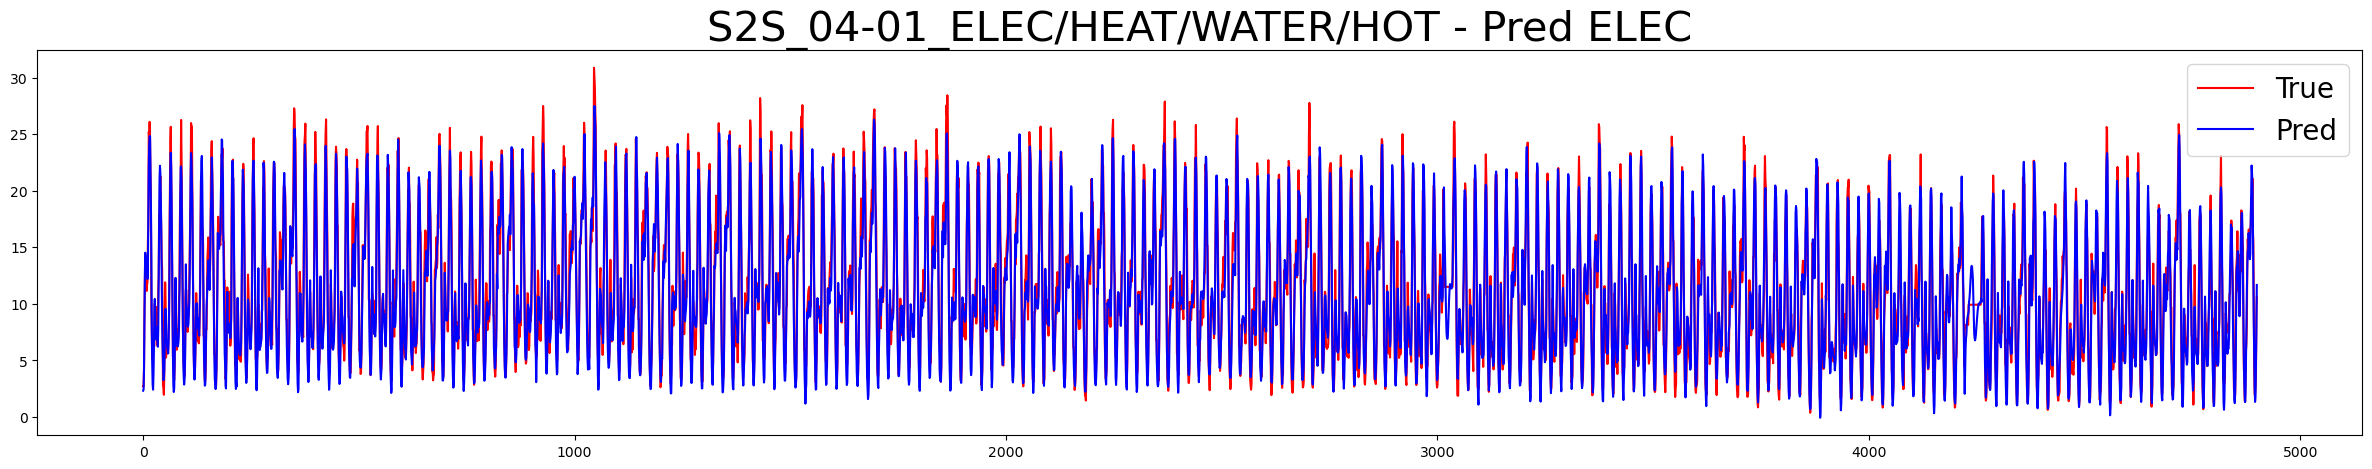

MAE  :  0.0
MAPE :  7648.4158
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8627


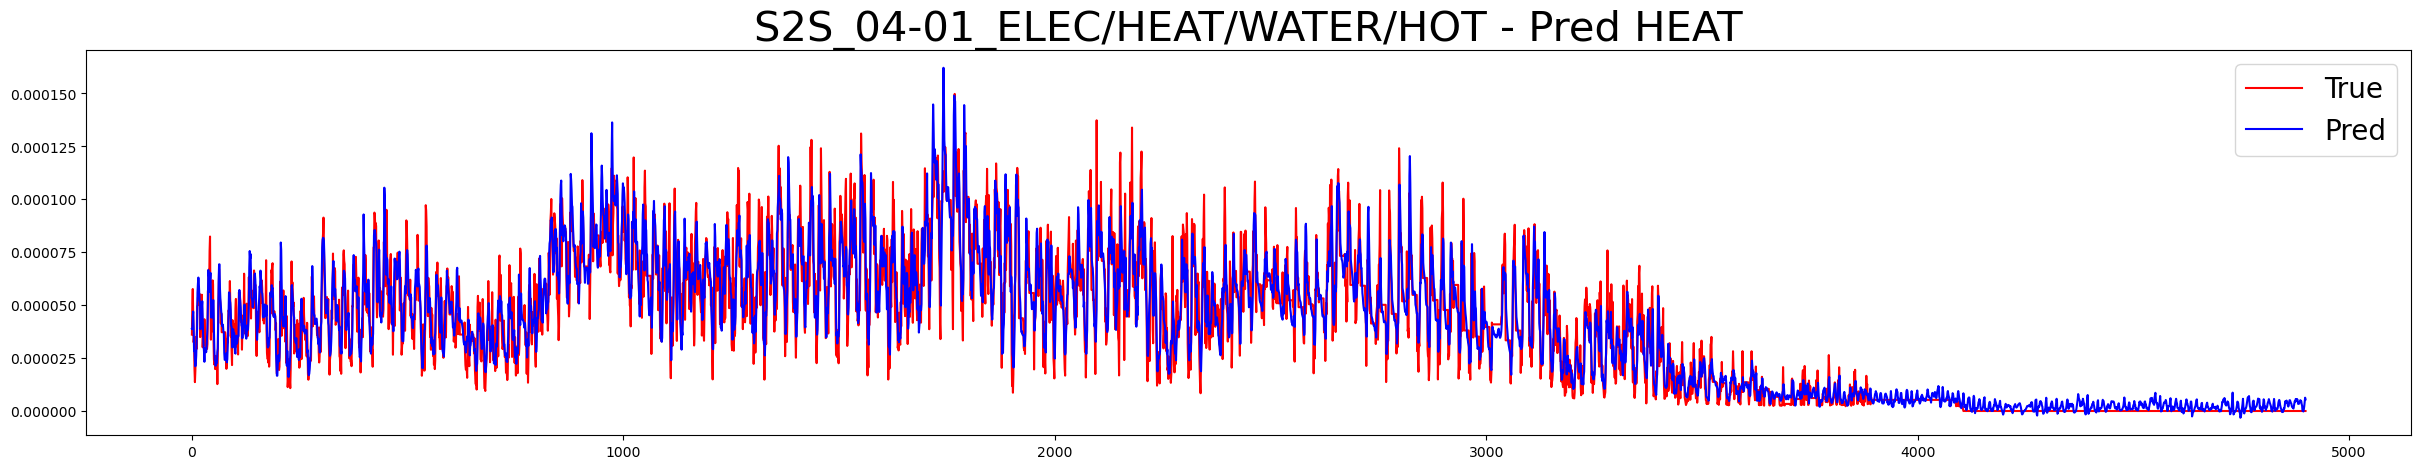

MAE  :  0.0432
MAPE :  0.2541
MSE  :  0.0032
RMSE :  0.0565
MBE :  0.0102
R2   :  0.7474


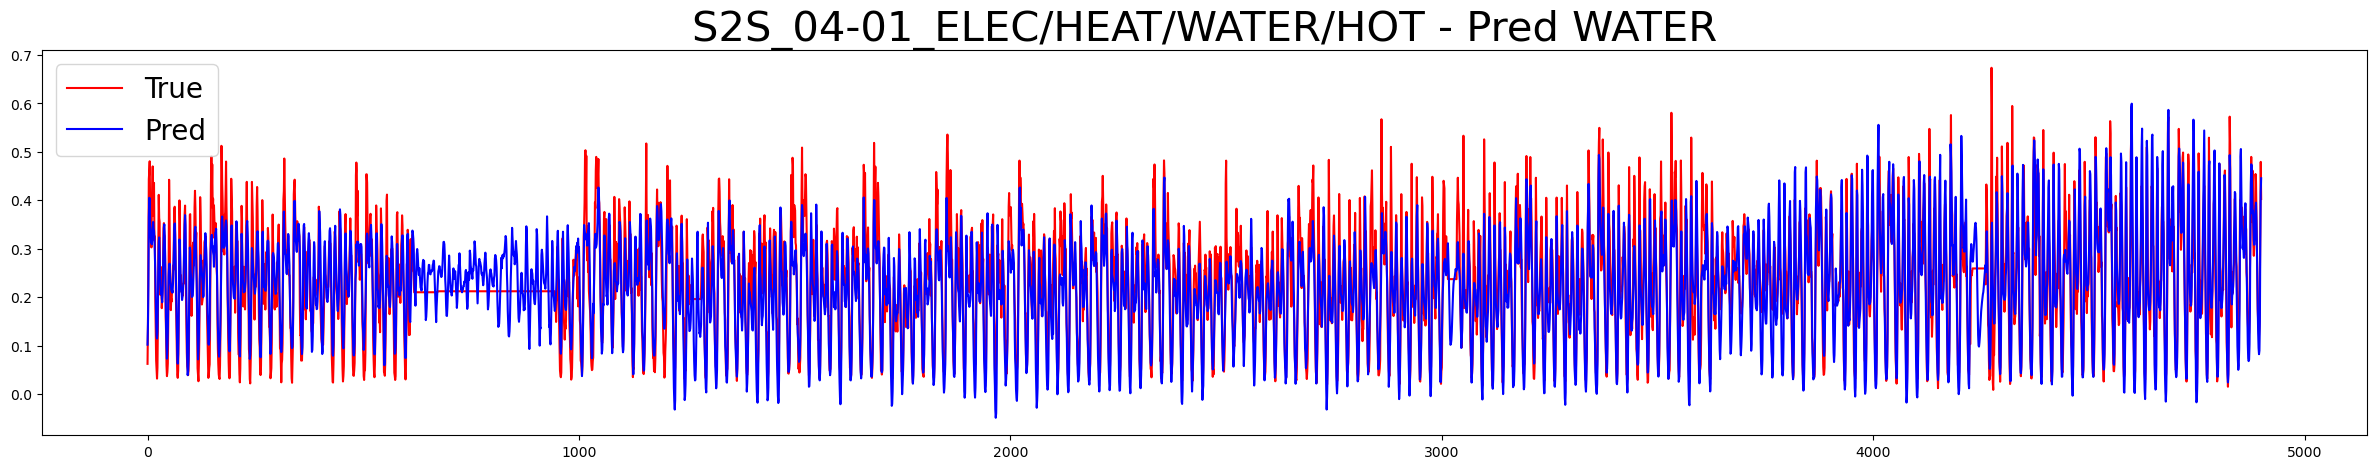

MAE  :  0.1489
MAPE :  1.4241
MSE  :  0.0573
RMSE :  0.2394
MBE :  0.058
R2   :  0.6664


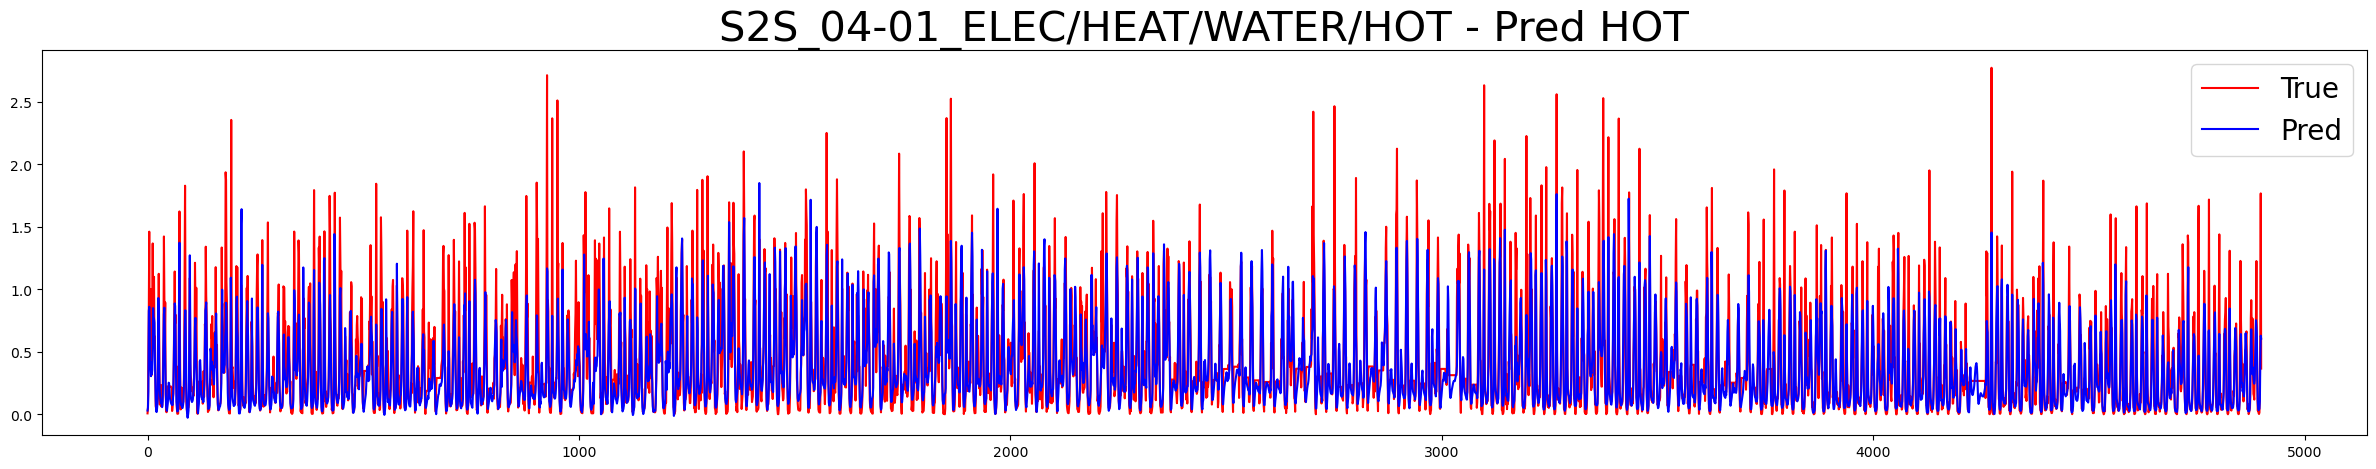

S2S_04-02_ELEC/HEAT/WATER/GAS
154/154 [==============================] - 1s 4ms/step
MAE  :  1.2758
MAPE :  0.1626
MSE  :  2.6804
RMSE :  1.6372
MBE :  -0.1694
R2   :  0.9291


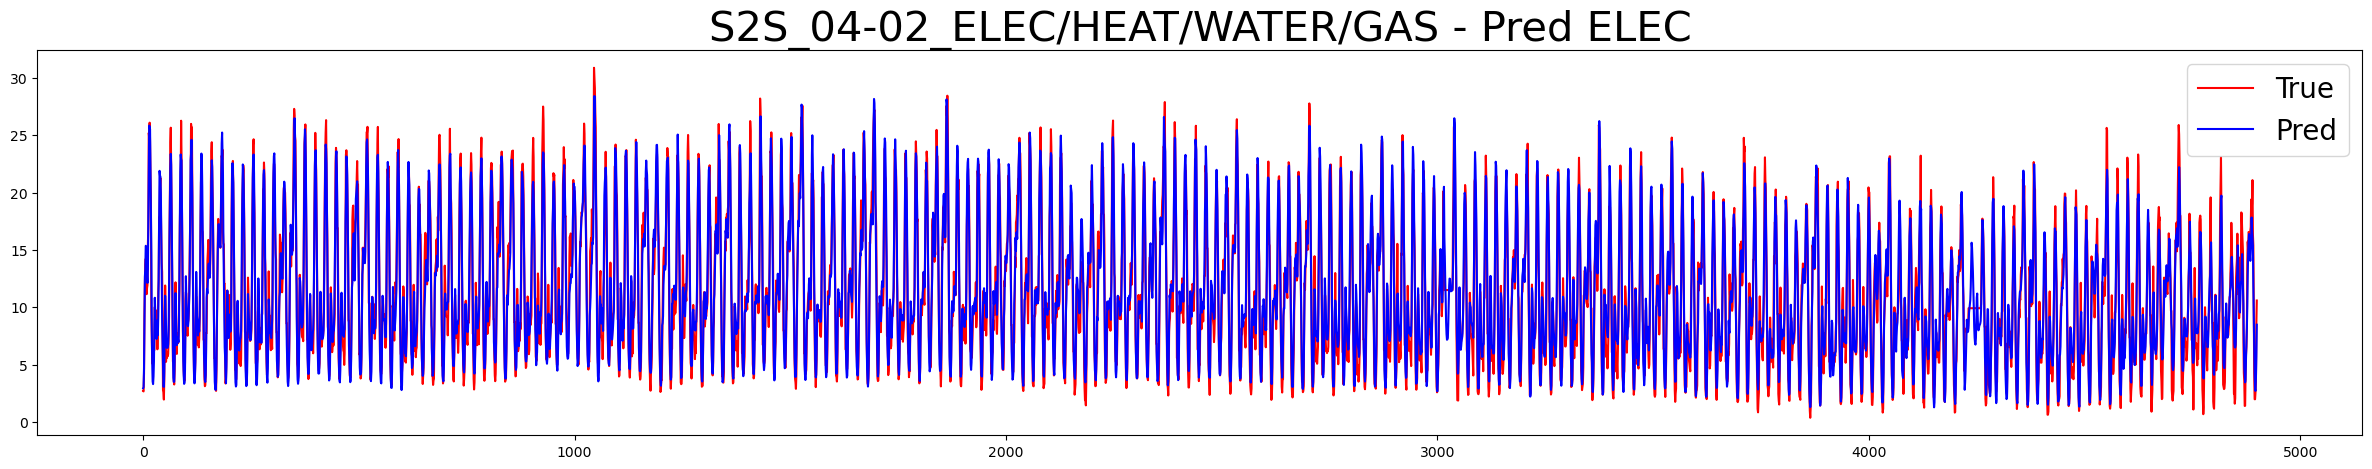

MAE  :  0.0
MAPE :  5403.0377
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8655


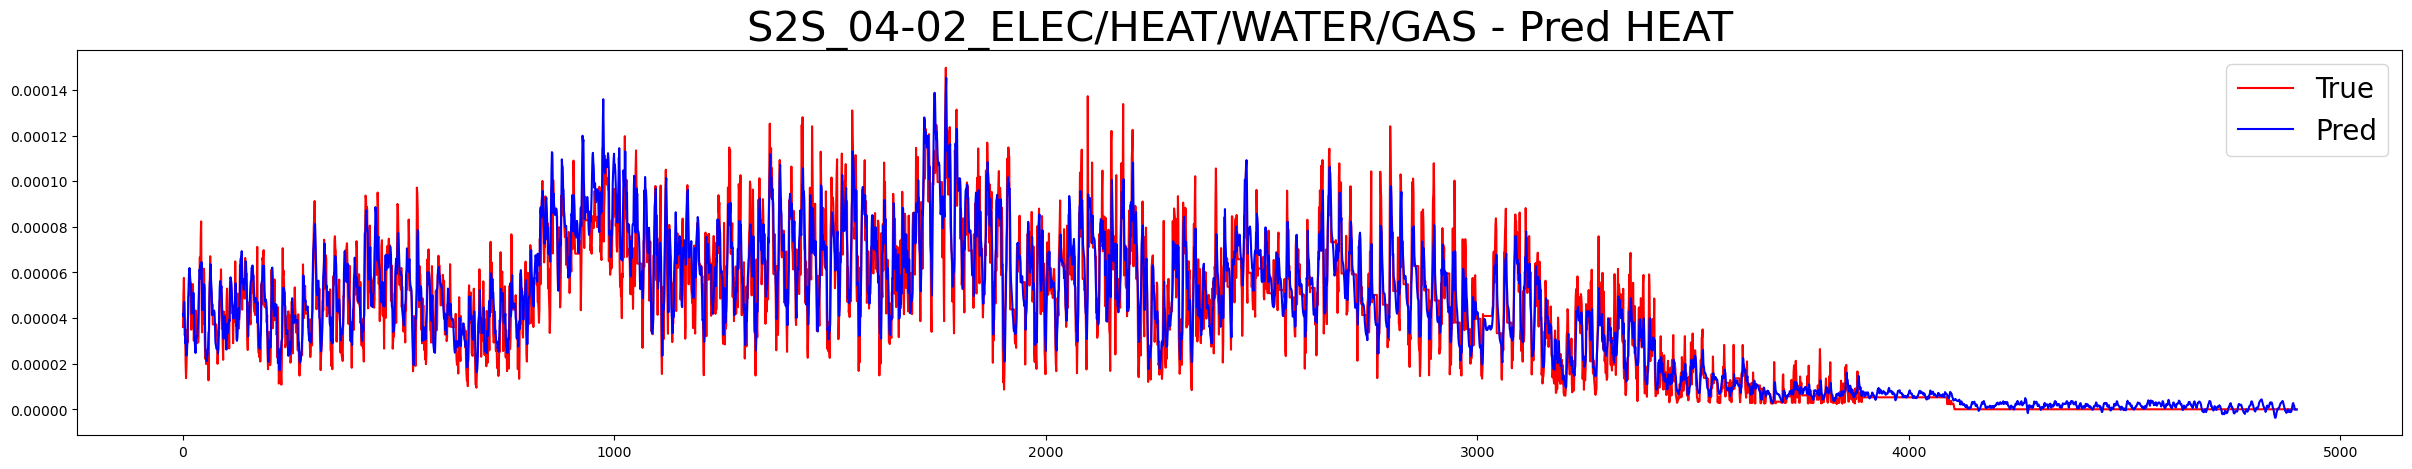

MAE  :  0.0412
MAPE :  0.2443
MSE  :  0.0029
RMSE :  0.0539
MBE :  0.0034
R2   :  0.7704


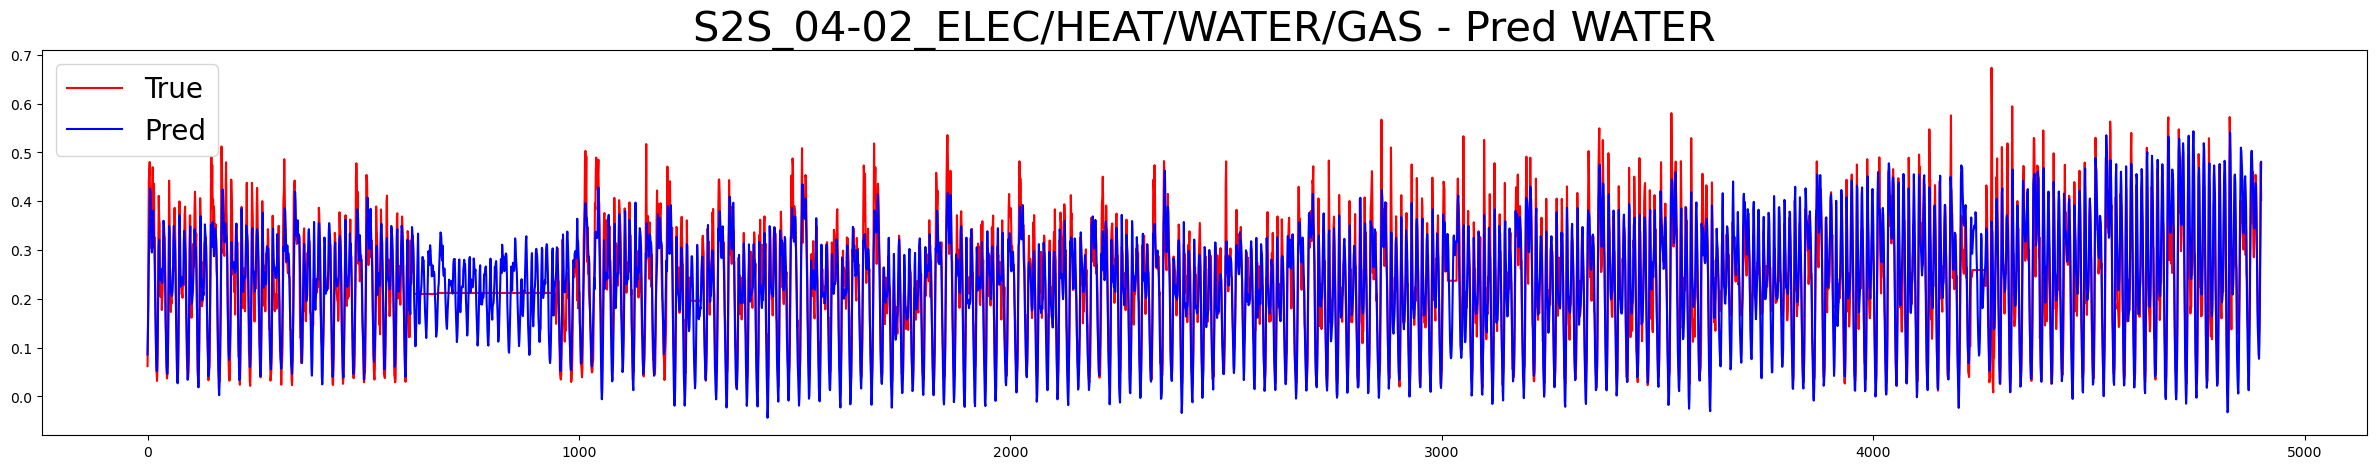

MAE  :  0.1533
MAPE :  10319892376045.287
MSE  :  0.0403
RMSE :  0.2009
MBE :  -0.0647
R2   :  0.4628


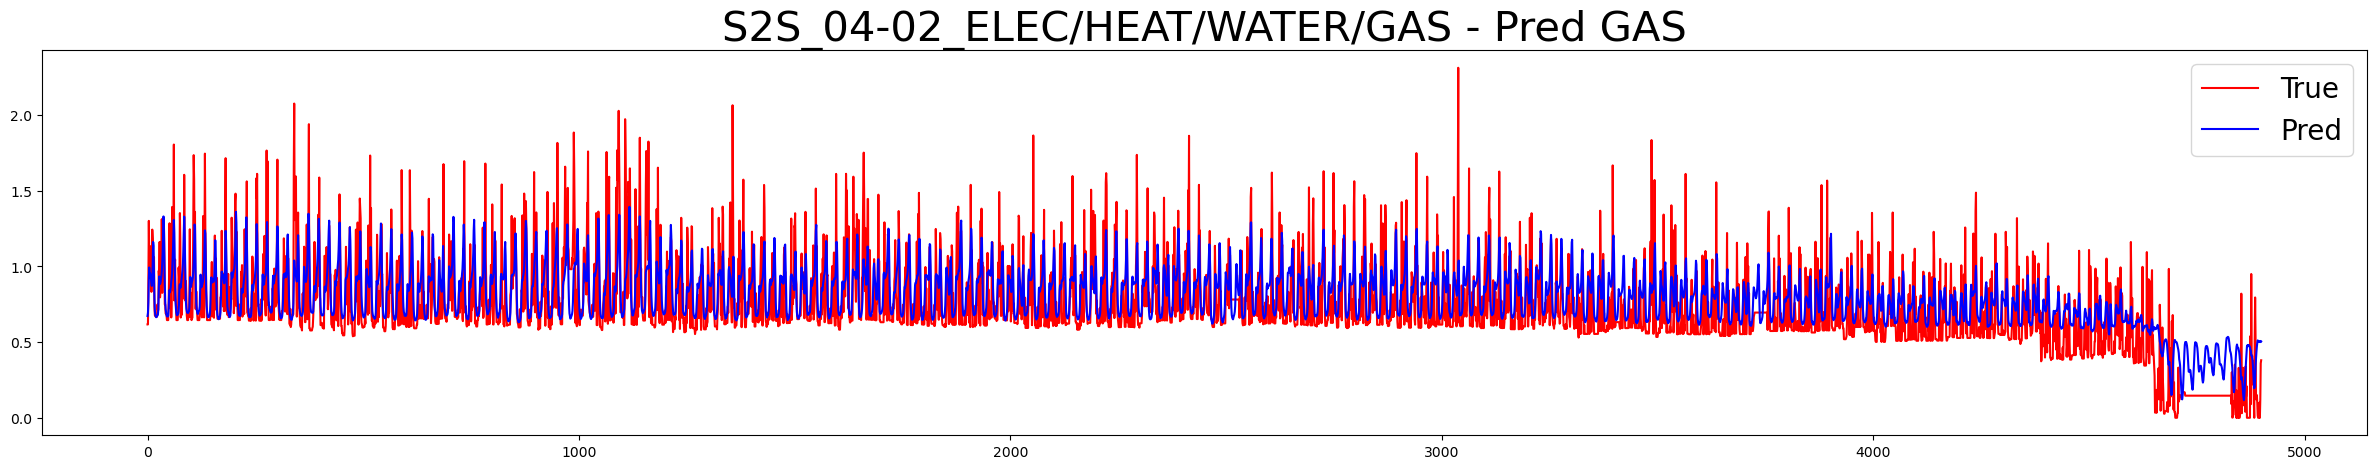

S2S_04-03_ELEC/HEAT/HOT/GAS
154/154 [==============================] - 1s 4ms/step
MAE  :  1.4102
MAPE :  0.1635
MSE  :  3.2644
RMSE :  1.8068
MBE :  0.3655
R2   :  0.9137


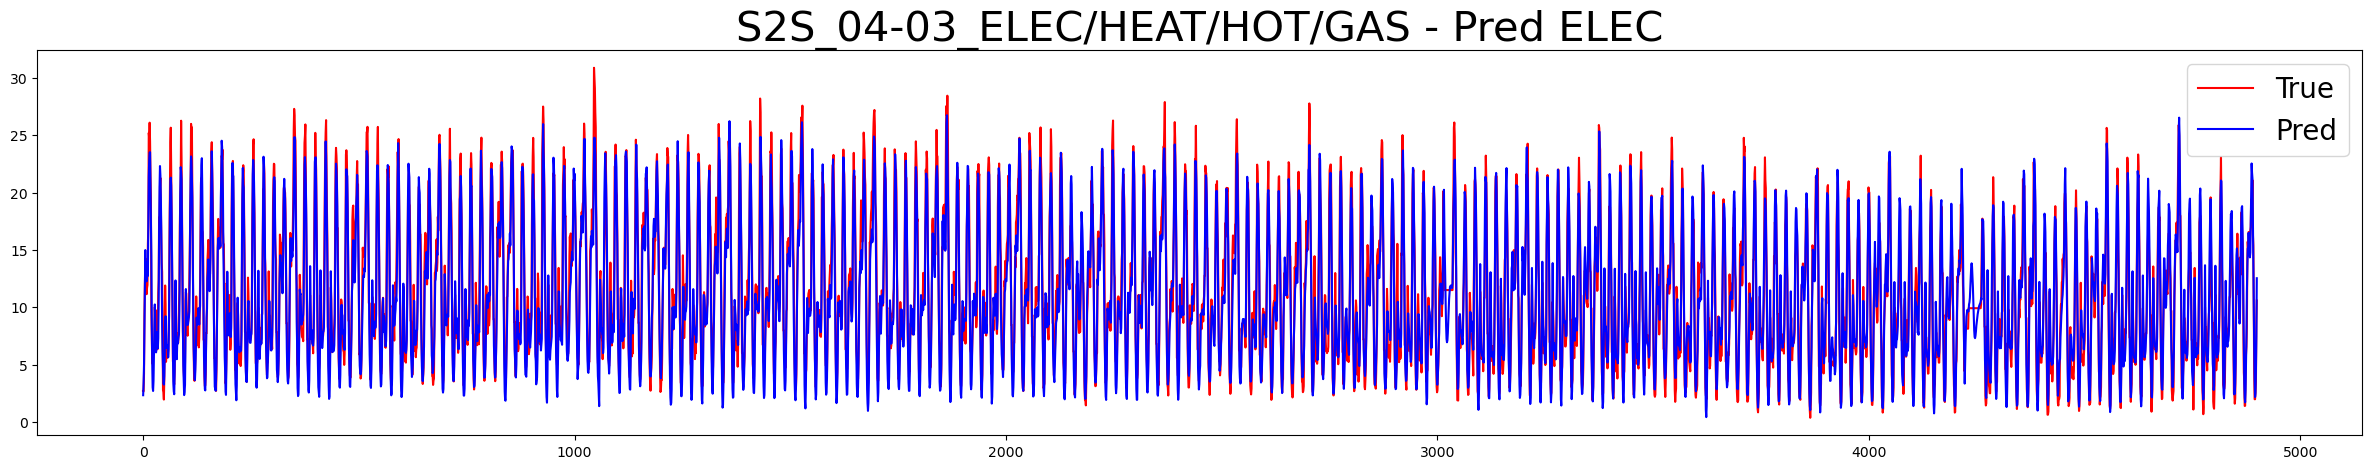

MAE  :  0.0
MAPE :  5066.7394
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8496


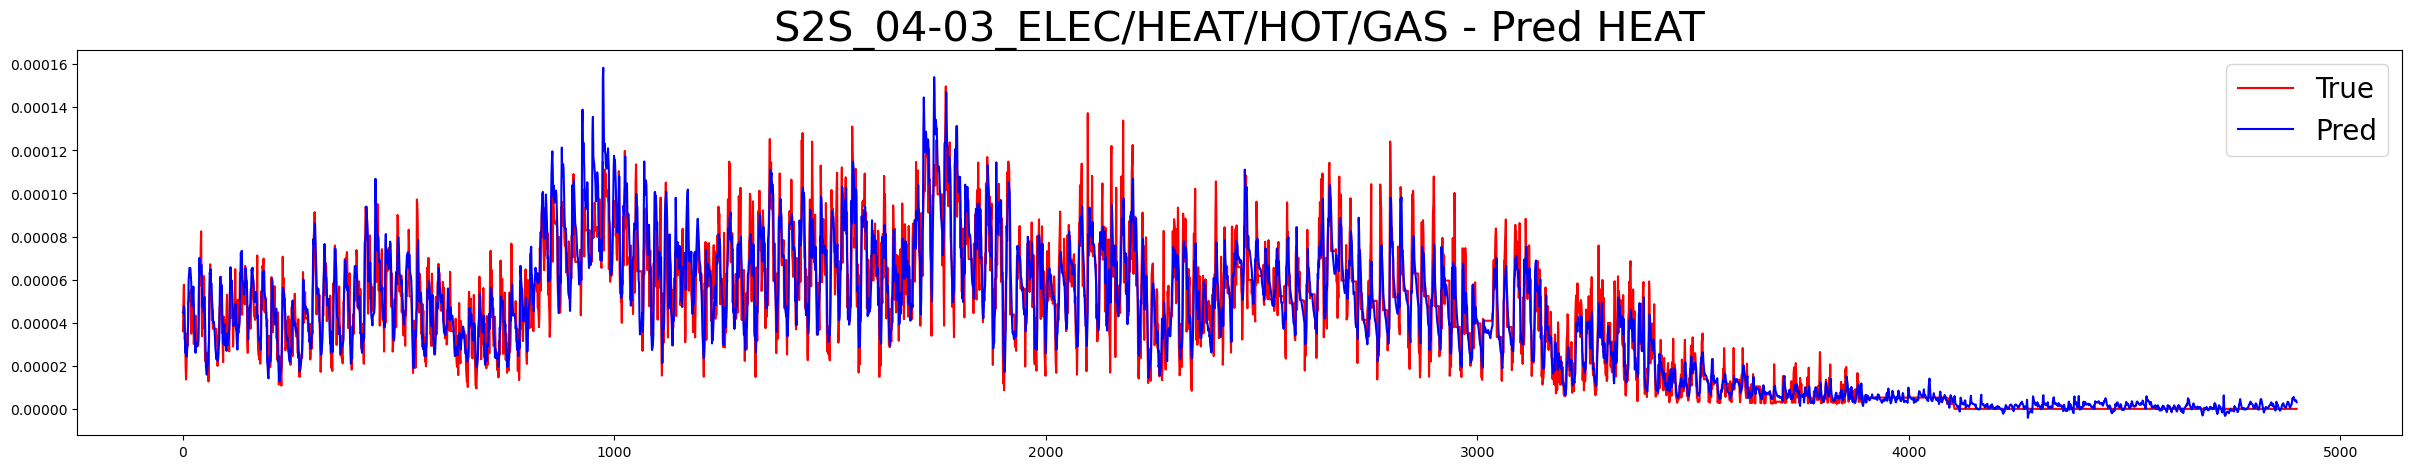

MAE  :  0.157
MAPE :  1.474
MSE  :  0.0609
RMSE :  0.2468
MBE :  0.0334
R2   :  0.6454


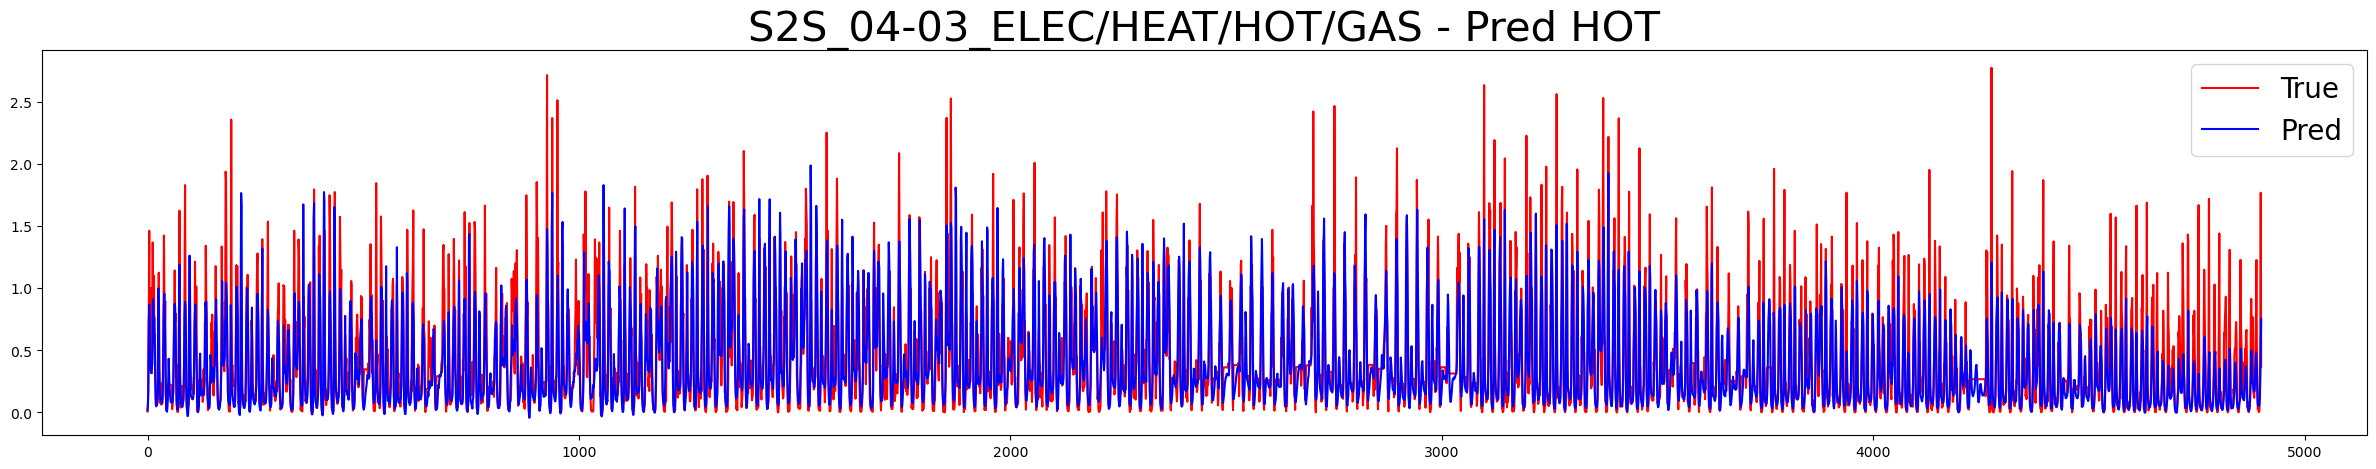

MAE  :  0.1576
MAPE :  11654070678393.684
MSE  :  0.0458
RMSE :  0.214
MBE :  -0.0565
R2   :  0.3899


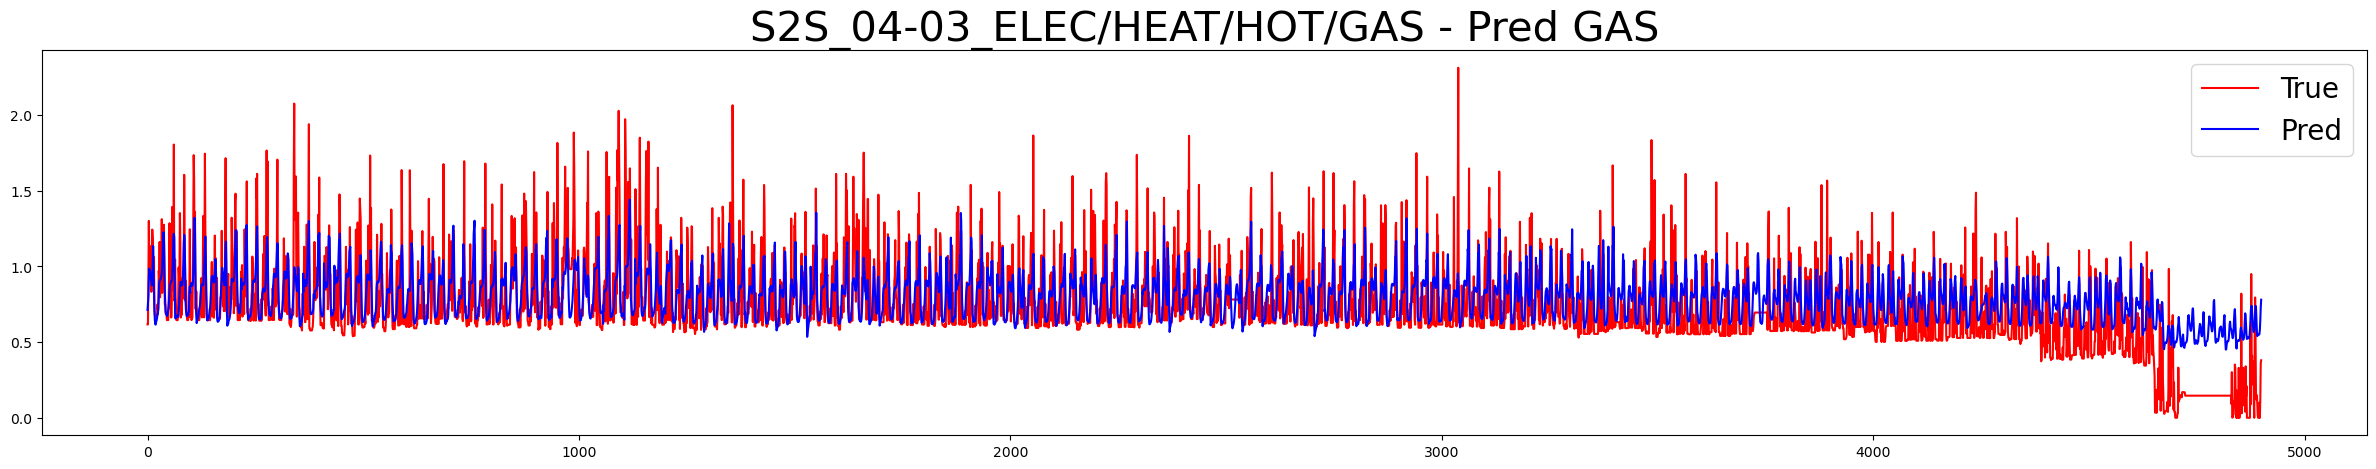

S2S_04-04_ELEC/WATER/HOT/GAS
154/154 [==============================] - 1s 4ms/step
MAE  :  1.2574
MAPE :  0.1512
MSE  :  2.5603
RMSE :  1.6001
MBE :  -0.1985
R2   :  0.9323


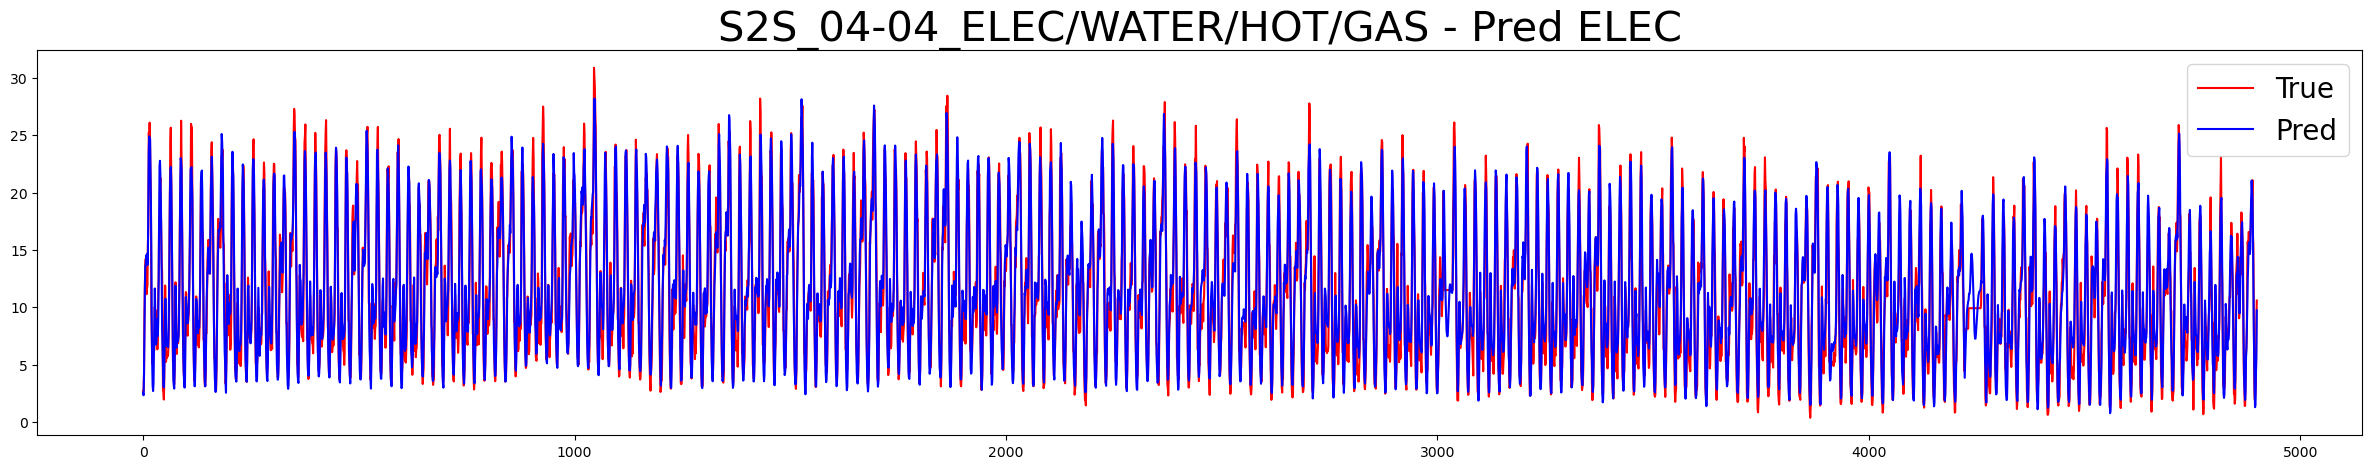

MAE  :  0.0
MAPE :  0.2192
MSE  :  0.0
RMSE :  0.0
MBE :  0.0
R2   :  0.7946


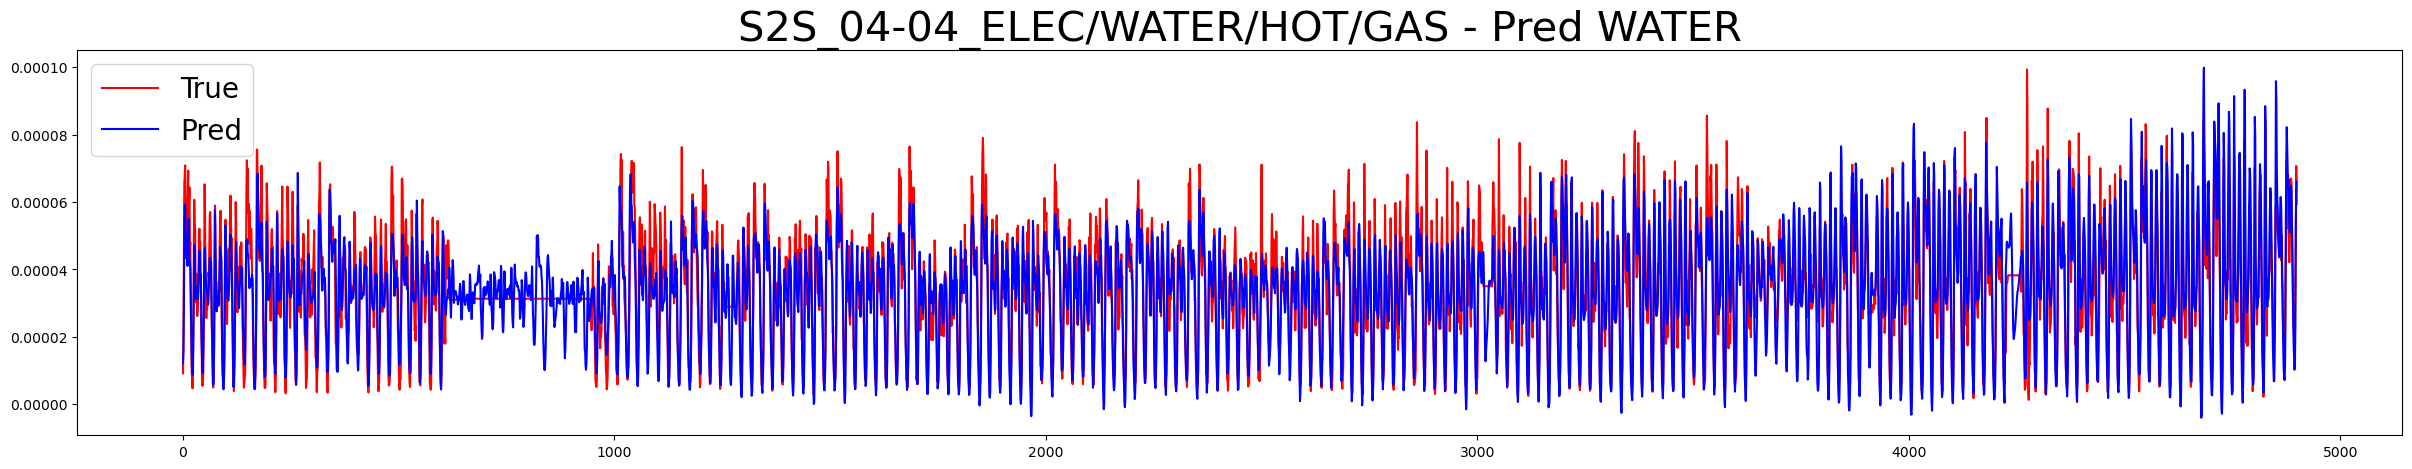

MAE  :  0.1401
MAPE :  1.3876
MSE  :  0.0492
RMSE :  0.2218
MBE :  0.0291
R2   :  0.7137


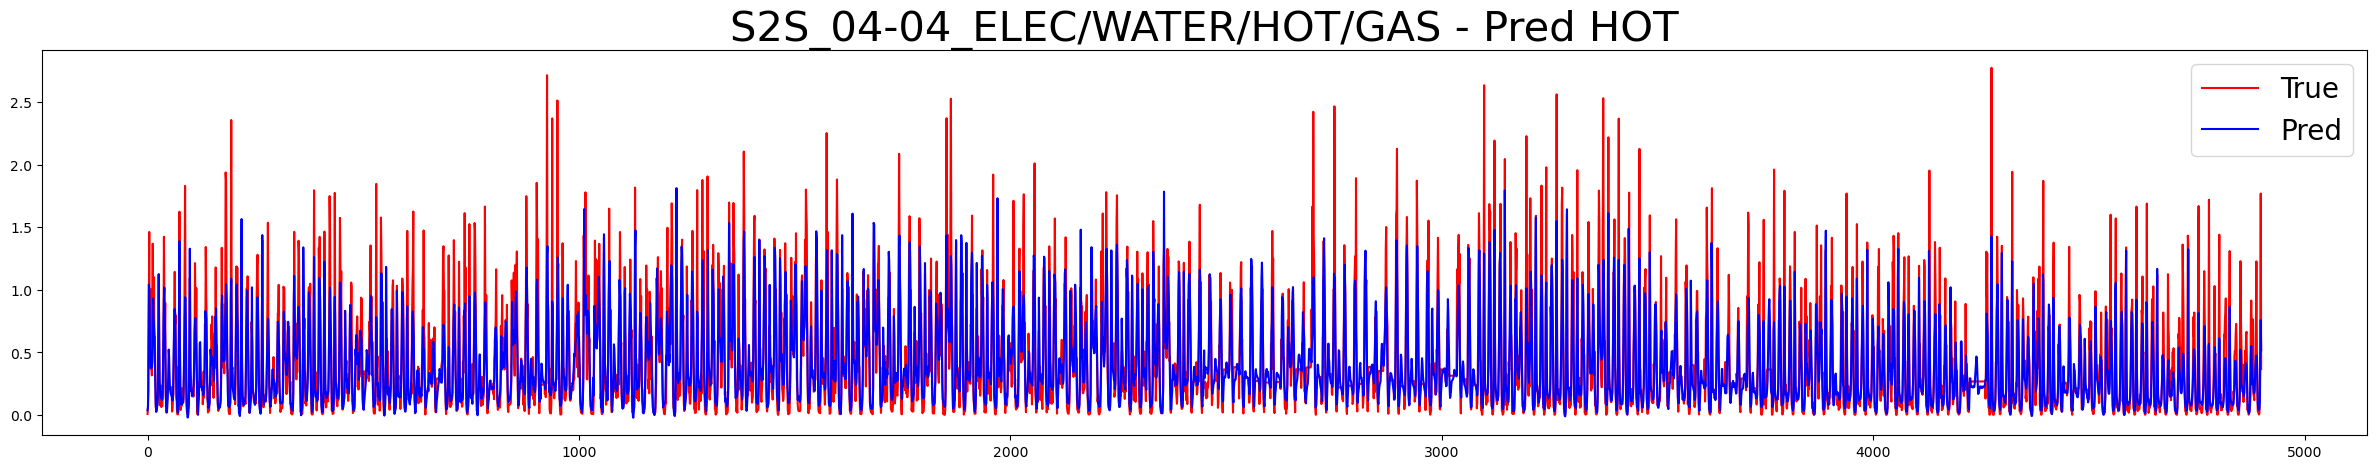

MAE  :  0.1741
MAPE :  12868659070448.14
MSE  :  0.0542
RMSE :  0.2327
MBE :  -0.0921
R2   :  0.2788


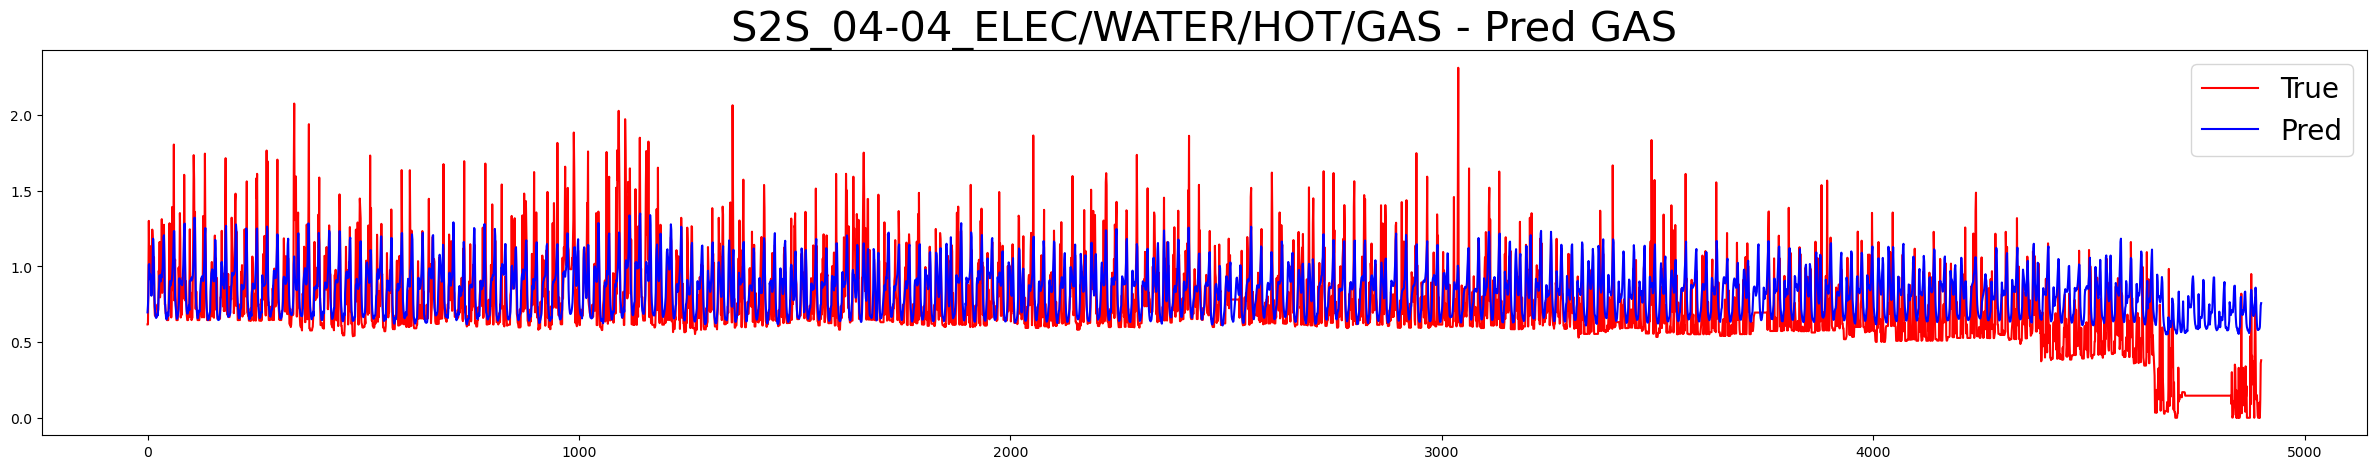

S2S_04-05_HEAT/WATER/HOT/GAS
154/154 [==============================] - 1s 4ms/step
MAE  :  1.3087
MAPE :  0.2697
MSE  :  3.6922
RMSE :  1.9215
MBE :  0.3339
R2   :  0.8526


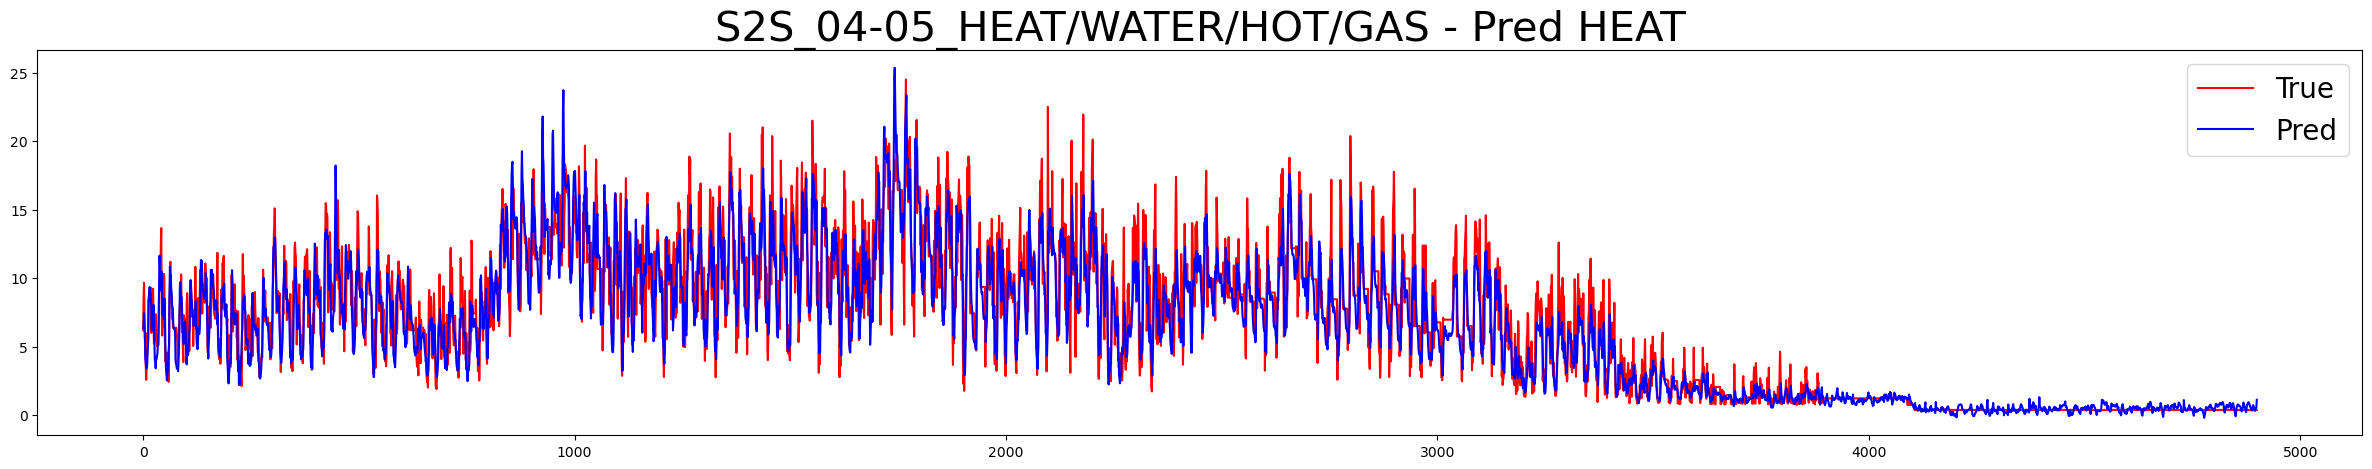

MAE  :  0.0
MAPE :  0.2355
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.7891


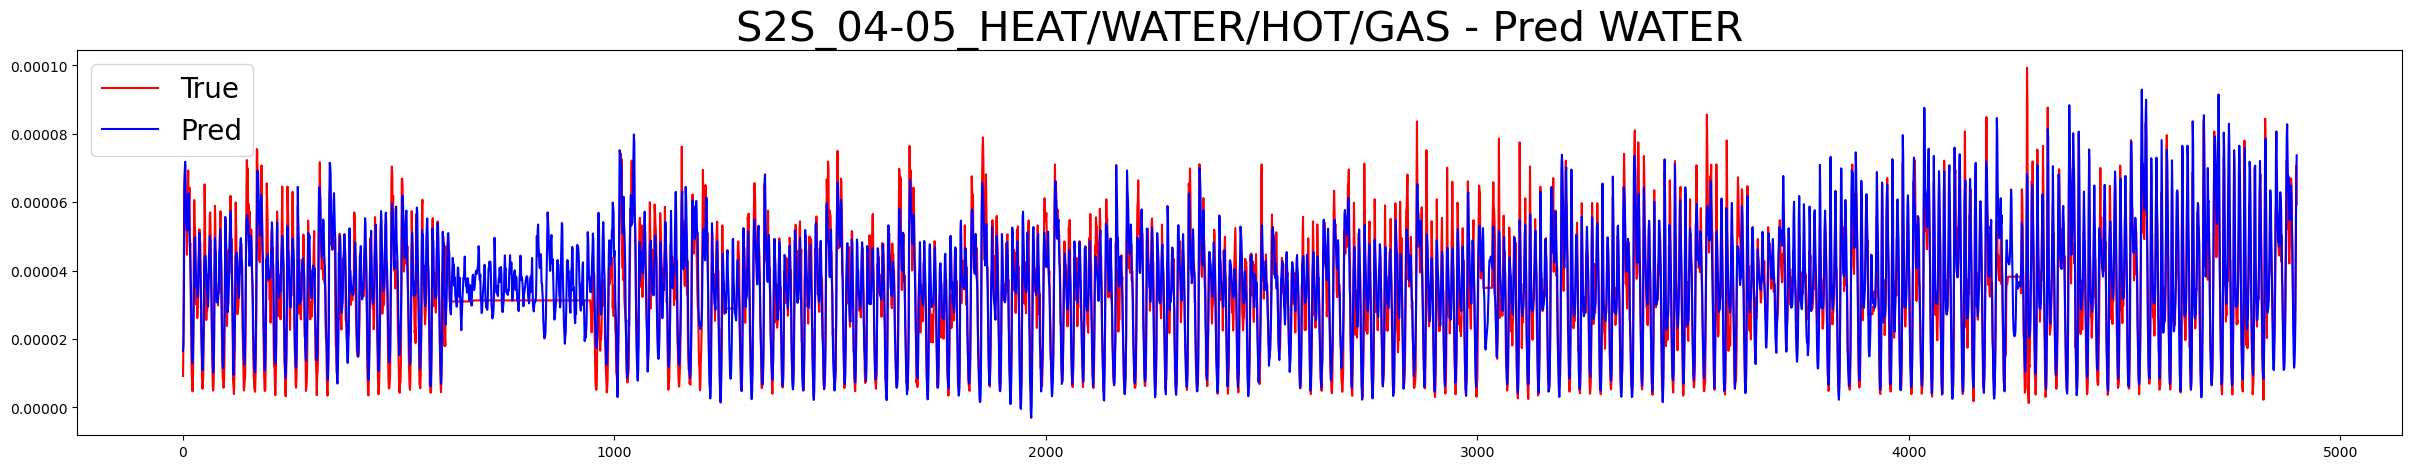

MAE  :  0.153
MAPE :  1.3427
MSE  :  0.0606
RMSE :  0.2463
MBE :  0.0763
R2   :  0.647


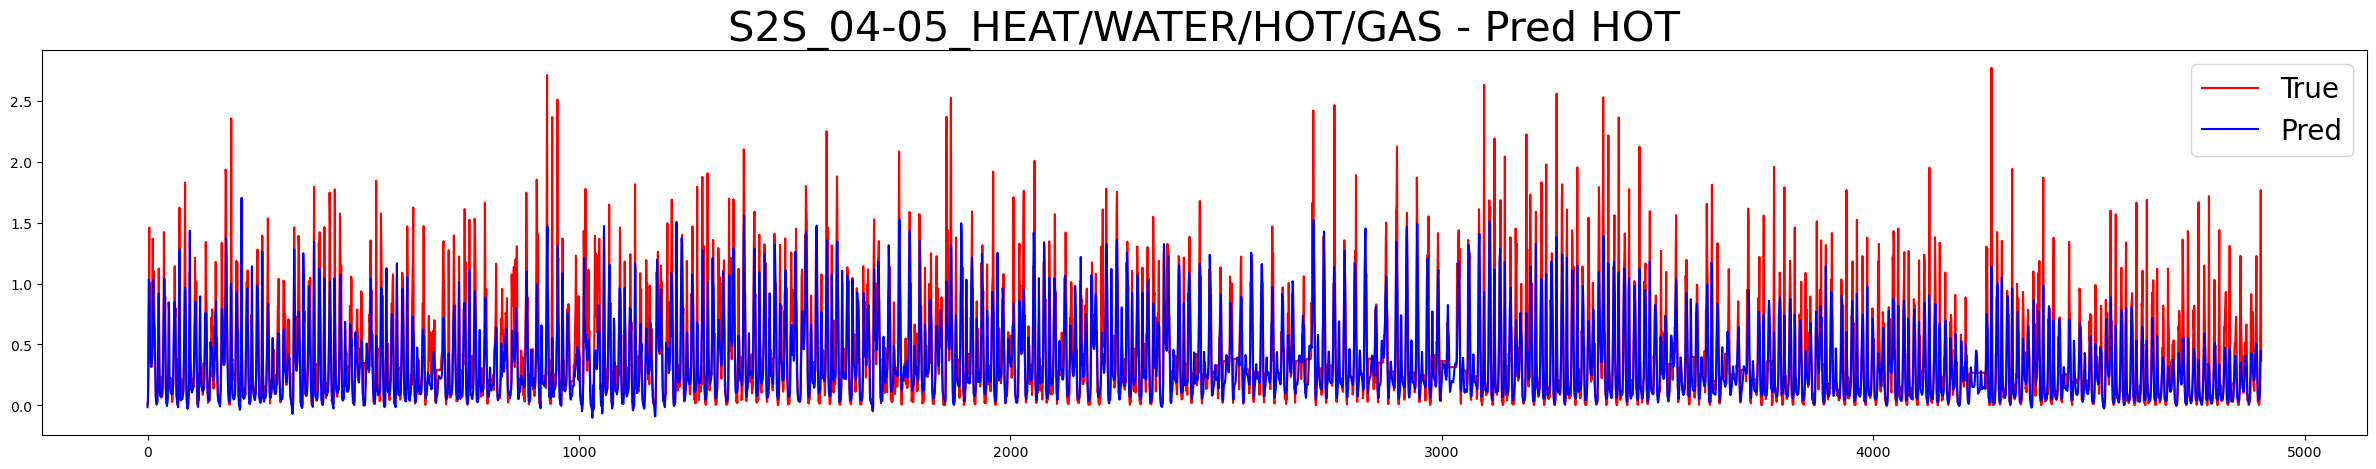

MAE  :  0.1553
MAPE :  11743144594469.61
MSE  :  0.0429
RMSE :  0.2071
MBE :  -0.0549
R2   :  0.4291


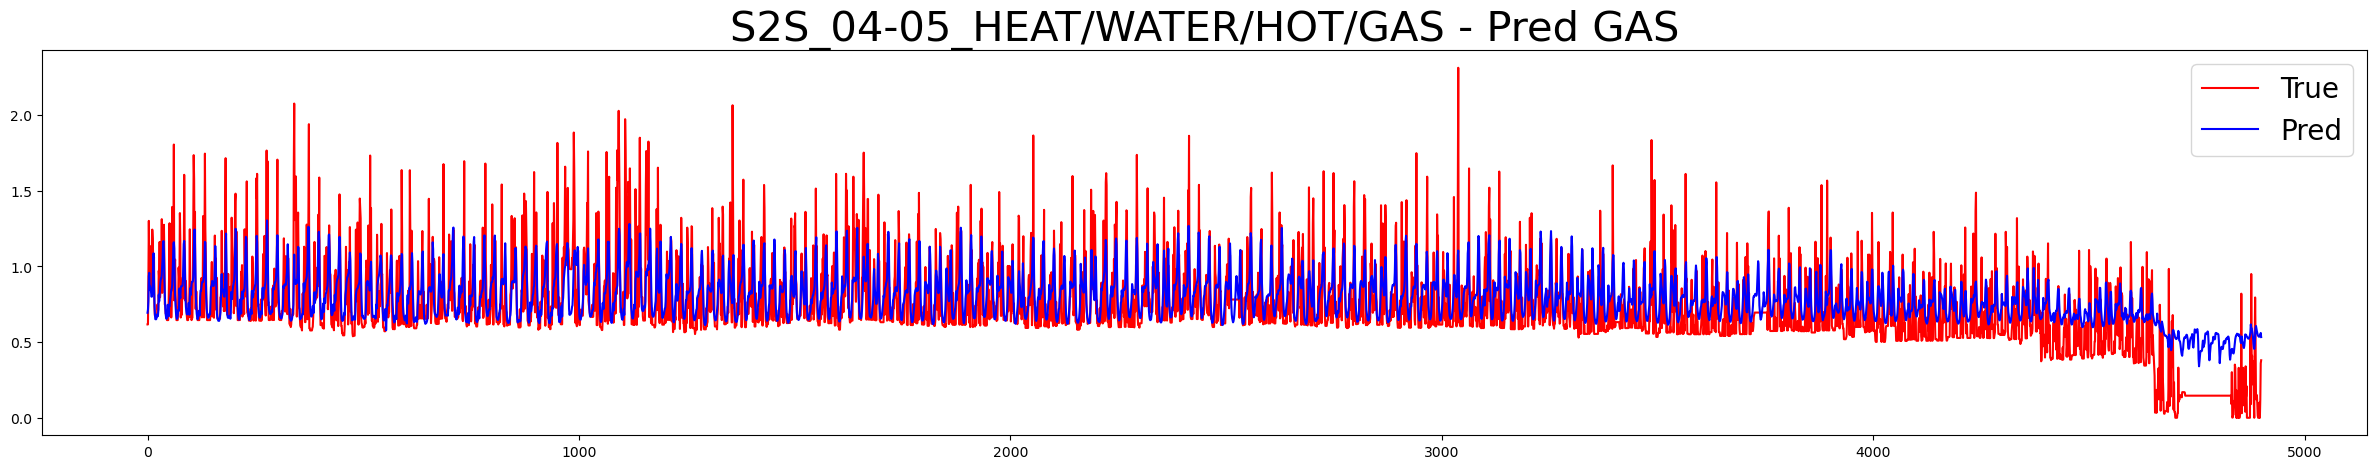

In [17]:
model_4multi_evaluation(model_4multi_0401, back_data, test0401x, test0401y, "S2S_04-01_ELEC/HEAT/WATER/HOT", ["ELEC", "HEAT", "WATER", "HOT"])
model_4multi_evaluation(model_4multi_0402, back_data, test0402x, test0402y, "S2S_04-02_ELEC/HEAT/WATER/GAS", ["ELEC", "HEAT", "WATER", "GAS"])
model_4multi_evaluation(model_4multi_0403, back_data, test0403x, test0403y, "S2S_04-03_ELEC/HEAT/HOT/GAS", ["ELEC", "HEAT", "HOT", "GAS"])
model_4multi_evaluation(model_4multi_0404, back_data, test0404x, test0404y, "S2S_04-04_ELEC/WATER/HOT/GAS", ["ELEC", "WATER", "HOT", "GAS"])
model_4multi_evaluation(model_4multi_0405, back_data, test0405x, test0405y, "S2S_04-05_HEAT/WATER/HOT/GAS", ["HEAT", "WATER", "HOT", "GAS"])